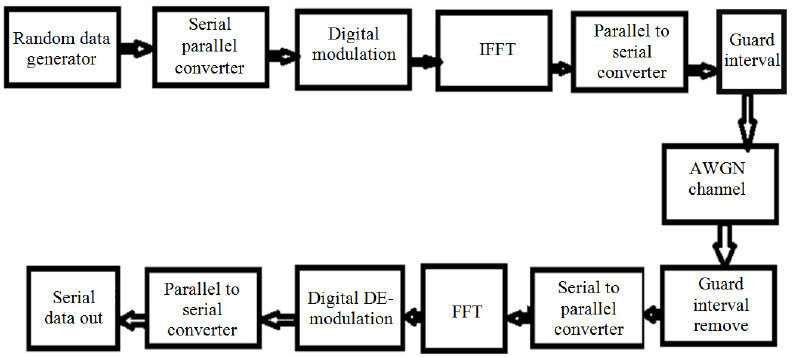

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
import math
import statistics
import time
from ModulationPy import QAMModem   #external library downloaded to perform QAM

### Defining OFDM parameters 

In [2]:
#Denoting no. of subcarriers with N
N=256

In [3]:
#Denoting no. of cyclic prefix with Cp
#Cp=4
Cp=N//4   # 25% of subacarriers used as channel prefix

In [4]:
#Denoting no. of pilot carriers with P. 
#Pilots will be used at the receiver to estimate the wireless channel between transmitter and receiver. 
#P=8
P=N//4
P

64

In [5]:
#Further, we also define the value (based on constellation map) that each pilots transmits (which is known to the receiver).
#Denoting it with Pv
Pv= 10+10j     #to be used during OFDM symbol creation

In [6]:
#Providing the indices for all the bits being data or pilot
all_index = np.arange(N)
all_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
#Arranging the indices for pilots
pilot_index = all_index[::N//P]
pilot_index

array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100,
       104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152,
       156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204,
       208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252])

In [8]:
#Adding a pilot at the end of the 64bit ofdm symbol just for TX RX convenience
pilot_index = np.hstack([pilot_index, np.array([all_index[-1]])])
pilot_index

array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100,
       104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152,
       156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204,
       208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 255])

In [9]:
#Incrementing the no. of pilot by 1
P = P+1

In [10]:
#Arranging the indices for original msg
msg_index = np.delete(all_index,pilot_index)
msg_index.shape

(191,)

Text(0.5,1,'Data - Pilot Organisation')

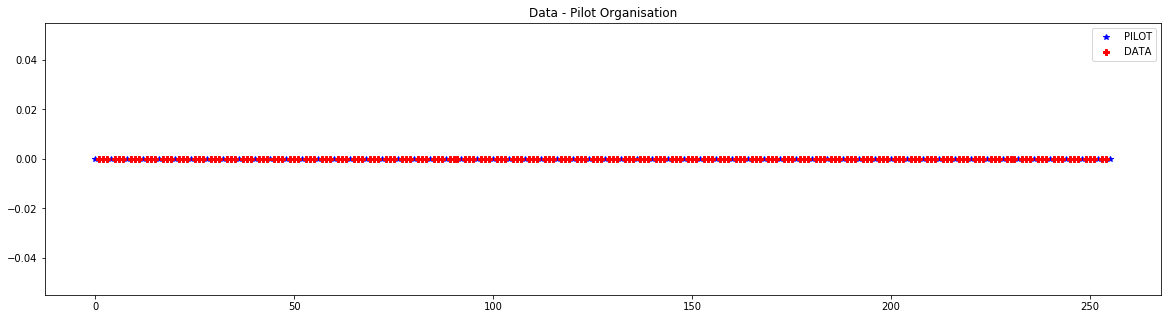

In [11]:
#Plotting the carrier elements msg.(red plus) & pilots(blue stars) in x=0 axis 
plt.figure(figsize=(20,5))
plt.plot(pilot_index, np.zeros_like(pilot_index), 'b*', label='PILOT')
plt.plot(msg_index, np.zeros_like(msg_index), 'rP', label='DATA')
plt.legend(loc="upper right")
plt.title("Data - Pilot Organisation")

In [12]:
#We'd use 16QAM so modulation index reqd. is 4 ====> 2^4 = 16
m=4

In [13]:
#Generating the ofdm payload to determine the no. of payload bits per OFDM symbol
ofdm_payload = len(msg_index)*m
ofdm_payload

764

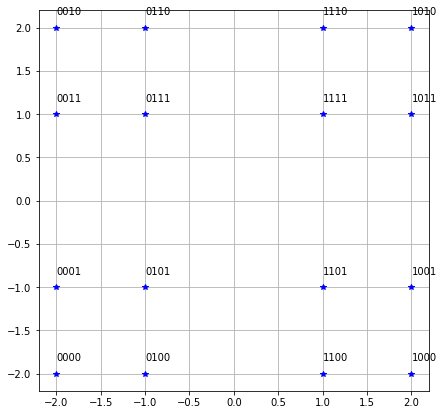

In [14]:
#Creating the constellation map for 16QAM

mapping_table = {
    (0,0,0,0) : -2-2j,    (0,0,0,1) : -2-1j,    (0,0,1,0) : -2+2j,    (0,0,1,1) : -2+1j,
    (0,1,0,0) : -1-2j,    (0,1,0,1) : -1-1j,    (0,1,1,0) : -1+2j,    (0,1,1,1) : -1+1j,
    (1,0,0,0) :  2-2j,    (1,0,0,1) :  2-1j,    (1,0,1,0) :  2+2j,    (1,0,1,1) :  2+1j,
    (1,1,0,0) :  1-2j,    (1,1,0,1) :  1-1j,    (1,1,1,0) :  1+2j,    (1,1,1,1) :  1+1j
}

plt.figure(figsize=(7,7))

for b3 in [0, 1]:
    for b2 in [0, 1]:
        for b1 in [0, 1]:
            for b0 in [0, 1]:
                B = (b3, b2, b1, b0)
                Q = mapping_table[B]
                plt.plot(Q.real, Q.imag, 'b*')
                plt.text(Q.real, Q.imag+0.15, "".join(str(x) for x in B), ha='left')
                plt.grid(True)

In [15]:
#Generating the reverse of mapping table
demapping_table = {i : j for j, i in mapping_table.items()}  #Simply reversing
demapping_table

{(-2-2j): (0, 0, 0, 0),
 (-2-1j): (0, 0, 0, 1),
 (-2+2j): (0, 0, 1, 0),
 (-2+1j): (0, 0, 1, 1),
 (-1-2j): (0, 1, 0, 0),
 (-1-1j): (0, 1, 0, 1),
 (-1+2j): (0, 1, 1, 0),
 (-1+1j): (0, 1, 1, 1),
 (2-2j): (1, 0, 0, 0),
 (2-1j): (1, 0, 0, 1),
 (2+2j): (1, 0, 1, 0),
 (2+1j): (1, 0, 1, 1),
 (1-2j): (1, 1, 0, 0),
 (1-1j): (1, 1, 0, 1),
 (1+2j): (1, 1, 1, 0),
 (1+1j): (1, 1, 1, 1)}

In [16]:
#Eiter use this ch resp

In [17]:
#Defining the impulse response of the wireless channel
channelResponse = np.array([1, 0, 0.1+0.1j])  
channelResponse

array([1. +0.j , 0. +0.j , 0.1+0.1j])

In [18]:
#Or this randomly generated one

#Making channel response based on channel length
ch_len = 2
channelResponse = np.random.randn(1,ch_len) + 1j * np.random.randn(1,ch_len)
print("channelResponse shape = ", channelResponse.shape)
channelResponse = channelResponse.ravel()    #Converting to 1D array
print("channelResponse shapeafter ravel = ", channelResponse.shape)
channelResponse

In [19]:
all_index.shape

(256,)

from sklearn import preprocessing
channelResponse = channelResponse//preprocessing.normalize(channelResponse)
channelResponse

#### for LS 

In [20]:
#Now doing the receiver end FFT to transform back to discrete freq.
###### This is the exact discrete freq. signals derived after IFFT. (No noise no effects of channel was there)

FFT_no_ch_orig_disc_freq_signal = np.fft.fft(channelResponse, N)
#FFT_no_ch_orig_disc_freq_signal = np.fft.fft(h, P)
FFT_no_ch_orig_disc_freq_signal

array([1.1       +0.1j       , 1.10478631+0.09497278j,
       1.10932019+0.08971676j, 1.1135907 +0.0842446j ,
       1.11758756+0.0785695j , 1.12130114+0.07270511j,
       1.1247225 +0.06666557j, 1.12784339+0.06046542j,
       1.1306563 +0.05411961j, 1.13315444+0.04764342j,
       1.1353318 +0.04105245j, 1.13718314+0.03436259j,
       1.13870398+0.02758994j, 1.13989068+0.02075082j,
       1.14074037+0.01386172j, 1.14125101+0.00693922j,
       1.14142136+0.j        , 1.14125101-0.00693922j,
       1.14074037-0.01386172j, 1.13989068-0.02075082j,
       1.13870398-0.02758994j, 1.13718314-0.03436259j,
       1.1353318 -0.04105245j, 1.13315444-0.04764342j,
       1.1306563 -0.05411961j, 1.12784339-0.06046542j,
       1.1247225 -0.06666557j, 1.12130114-0.07270511j,
       1.11758756-0.0785695j , 1.1135907 -0.0842446j ,
       1.10932019-0.08971676j, 1.10478631-0.09497278j,
       1.1       -0.1j       , 1.09497278-0.10478631j,
       1.08971676-0.10932019j, 1.0842446 -0.1135907j ,
       1.0

#### for MMSE 

In [21]:
h = channelResponse/np.linalg.norm(channelResponse)
h

array([0.99014754+0.j        , 0.        +0.j        ,
       0.09901475+0.09901475j])

In [22]:
H = np.fft.fft(h, P)
H

array([1.0891623 +0.09901475j, 1.10634104+0.07814674j,
       1.11919045+0.054367j  , 1.12723175+0.02856156j,
       1.13016533+0.00169192j, 1.12788188-0.02524075j,
       1.12046648-0.05123297j, 1.10819544-0.07531625j,
       1.09152595-0.09659328j, 1.07107914-0.11427126j,
       1.04761683-0.12769152j, 1.02201323-0.13635403j,
       0.99522233-0.13993602j, 0.96824234-0.13830403j,
       0.94207853-0.13151887j, 0.91770576-0.11983335j,
       0.89603215-0.10368286j, 0.87786526-0.08366919j,
       0.86388198-0.06053801j, 0.85460332-0.03515121j,
       0.85037501-0.00845468j, 0.85135458+0.01855687j,
       0.85750555+0.04487699j, 0.86859872+0.06952501j,
       0.88422077+0.09158254j, 0.90378963+0.11022774j,
       0.92657616+0.12476587j, 0.95173134+0.13465526j,
       0.9783179 +0.13952743j, 1.00534523+0.13920084j,
       1.0318063 +0.13368766j, 1.05671518+0.12319332j,
       1.07914376+0.10810882j, 1.09825636+0.08899622j,
       1.11334086+0.06656763j, 1.1238352 +0.04165876j,
       1.1

plt.plot(all_index, abs(FFT_no_ch_orig_disc_freq_signal),'r')

#### SISO

SNRdb = 20  # signal to noise-ratio in dB at the receiver (considered as a recommended value)

#### SIMO

In [23]:
#taking an array of SNR's just to plot with final BER to confirm where the BER is least
SNRdb_arr=[]
SNRdb_arr = [i for i in range(0,41,1)]
SNRdb_arr

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [24]:
snr_len=len(SNRdb_arr)
snr_len

41

### Binary data input

In [25]:
#We generate a random binary data using bernoulli distribution with probability of 0 & 1 be 50%
input_data = np.random.binomial(n=1, p=0.5, size=(ofdm_payload, ))
input_data

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,

In [26]:
print ("Bits count of input_data: ", len(input_data))
print ("Mean of bits (should be around 0.5): ", np.mean(input_data))
print ("First 30 bits of input_data: ", input_data[:30])

Bits count of input_data:  764
Mean of bits (should be around 0.5):  0.5039267015706806
First 30 bits of input_data:  [0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1]


### Serial to Parallel Conversion 

In [27]:
#The bits are now sent to a serial-to-parallel converter, which groups the bits for the OFDM frame into 
# groups of m bits (i.e. one group for each subcarrier):
def S_P_conv(input_data):
    return input_data.reshape((len(msg_index), m))   #converting 1D array to 2D array

In [28]:
#After serial to parallel conversion data looks like this - 
# As we'd use 16QAM 4 bits need to be taken at a time (therefeore m=4 was initialized before) 
bits_S_P_conv = S_P_conv(input_data)
print(bits_S_P_conv[:])
print("Shape of bits_S_P_conv :",bits_S_P_conv.shape)

[[0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [1 0 1 0]
 [1 1 1 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 0 1 0]
 [0 1 1 0]
 [1 1 1 0]
 [0 0 0 0]
 [0 0 1 1]
 [1 1 1 0]
 [0 1 0 0]
 [0 0 1 1]
 [1 1 1 0]
 [0 1 1 0]
 [0 1 1 1]
 [1 1 1 0]
 [0 1 0 1]
 [0 0 1 0]
 [1 0 1 1]
 [0 1 0 1]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 1 1]
 [0 0 1 0]
 [1 1 1 0]
 [1 1 1 1]
 [0 1 0 1]
 [0 0 1 1]
 [0 0 0 0]
 [1 1 0 1]
 [0 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 0]
 [1 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [1 0 1 1]
 [0 0 0 0]
 [1 0 0 1]
 [1 0 0 0]
 [0 1 0 1]
 [1 1 0 1]
 [1 1 1 1]
 [0 0 1 1]
 [1 0 1 0]
 [1 1 1 1]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 1]
 [0 0 1 0]
 [1 1 0 1]
 [1 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 1 0]
 [1 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 1 1]
 [1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]
 [1 1 1 0]
 [0 1 1 1]
 [1 1 1 0]
 [0 1 1 1]
 [0 0 0 1]
 [0 0 0 0]
 [1 0 0 1]
 [1 0 1 1]
 [1 0 0 0]

### Mapping the data - doing QAM 16

In [29]:
def Mapping(input_data):
    return np.array([mapping_table[tuple(b)] for b in input_data])

#Simply mapping the 55 subcarrier bits to the mapped constellation of 16QAM 
QAM16 = Mapping(bits_S_P_conv)
print(bits_S_P_conv[:])
print("This is mapped & QAM16 is produced")
print(QAM16[:])
print("Shape after mapping :",QAM16.shape)  #Converting the 2D array to mapped 1D array

[[0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [1 0 1 0]
 [1 1 1 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 0 1 0]
 [0 1 1 0]
 [1 1 1 0]
 [0 0 0 0]
 [0 0 1 1]
 [1 1 1 0]
 [0 1 0 0]
 [0 0 1 1]
 [1 1 1 0]
 [0 1 1 0]
 [0 1 1 1]
 [1 1 1 0]
 [0 1 0 1]
 [0 0 1 0]
 [1 0 1 1]
 [0 1 0 1]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [1 0 1 1]
 [0 0 1 0]
 [1 1 1 0]
 [1 1 1 1]
 [0 1 0 1]
 [0 0 1 1]
 [0 0 0 0]
 [1 1 0 1]
 [0 1 0 0]
 [1 1 0 0]
 [1 1 0 0]
 [0 1 1 1]
 [0 1 1 1]
 [0 1 1 0]
 [1 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 1 0]
 [1 0 1 1]
 [0 0 0 0]
 [1 0 0 1]
 [1 0 0 0]
 [0 1 0 1]
 [1 1 0 1]
 [1 1 1 1]
 [0 0 1 1]
 [1 0 1 0]
 [1 1 1 1]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 1]
 [0 0 1 0]
 [1 1 0 1]
 [1 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 1]
 [1 0 1 0]
 [0 1 1 0]
 [1 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 1 1]
 [1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]
 [1 1 1 0]
 [0 1 1 1]
 [1 1 1 0]
 [0 1 1 1]
 [0 0 0 1]
 [0 0 0 0]
 [1 0 0 1]
 [1 0 1 1]
 [1 0 0 0]

modem = QAMModem(16, bin_input=False, soft_decision=False, bin_output=False)  #16QAM
Dmod = modem.modulate(bits_S_P_conv)      #modulation
Dmod

### Generating the OFDM symbol

In [30]:
def OFDM_symbol(QAM_payload):
    symbol = np.zeros(N, dtype=complex)   # initialising the overall N subcarriers with zeros
    symbol[pilot_index] = Pv    # allocate the pilot subcarriers with pilot value
    symbol[msg_index] = QAM_payload    # allocate the data subcarriers with the constellation mapped values
    return symbol


OFDM_data = OFDM_symbol(QAM16)
print ("OFDM symbol: ", OFDM_data)
print ("OFDM carriers in frequency domain constituting a single OFDM symbol: ", len(OFDM_data))

OFDM symbol:  [10.+10.j -2. -1.j -2. +2.j -2. +1.j 10.+10.j -1. -1.j -2. +2.j -2. +1.j
 10.+10.j  2. +2.j  1. +2.j -1. -1.j 10.+10.j -1. +2.j -2. +2.j -1. +2.j
 10.+10.j  1. +2.j -2. -2.j -2. +1.j 10.+10.j  1. +2.j -1. -2.j -2. +1.j
 10.+10.j  1. +2.j -1. +2.j -1. +1.j 10.+10.j  1. +2.j -1. -1.j -2. +2.j
 10.+10.j  2. +1.j -1. -1.j  2. -2.j 10.+10.j  1. -2.j  1. -2.j  1. -2.j
 10.+10.j  2. +1.j -2. +2.j  1. +2.j 10.+10.j  1. +1.j -1. -1.j -2. +1.j
 10.+10.j -2. -2.j  1. -1.j -1. -2.j 10.+10.j  1. -2.j  1. -2.j -1. +1.j
 10.+10.j -1. +1.j -1. +2.j  2. -1.j 10.+10.j  2. -2.j -2. -1.j -1. +2.j
 10.+10.j  2. +1.j -2. -2.j  2. -1.j 10.+10.j  2. -2.j -1. -1.j  1. -1.j
 10.+10.j  1. +1.j -2. +1.j  2. +2.j 10.+10.j  1. +1.j  2. -1.j  2. +2.j
 10.+10.j -1. -2.j  2. -1.j -2. +2.j 10.+10.j  1. -1.j  1. -2.j -2. +2.j
 10.+10.j -2. -1.j  1. +1.j  1. +1.j 10.+10.j  1. +1.j  2. -2.j -2. -1.j
 10.+10.j -1. -1.j  2. +2.j -1. +2.j 10.+10.j  1. -2.j -1. -2.j -2. -1.j
 10.+10.j  2. +1.j  1. -2.j  2. -1.j 

### Converting the discrete frequency domain signal to discrete time domain Using IFFT 

In [31]:
def IFFT(OFDM_data):
    return np.fft.ifft(OFDM_data)
    #return (1/N)*np.fft.ifft(OFDM_data)

time_domain_OFDM = IFFT(OFDM_data)
print ("OFDM symbol: ", time_domain_OFDM)
print ("OFDM carriers in frequency domain constituting a single OFDM symbol: ", len(OFDM_data))

OFDM symbol:  [ 2.57031250e+00+2.71093750e+00j  4.45532657e-02+1.61158296e-01j
 -2.96196459e-02+8.35896163e-02j -2.41398730e-02+1.44977493e-02j
 -1.07852111e-01+2.87188850e-02j  1.12229038e-02-8.61317404e-03j
  2.49458423e-03-7.43210681e-02j  9.94996797e-02+6.89814600e-02j
  2.30566358e-02+1.02310662e-02j  7.51221682e-02+1.49846829e-01j
  6.64477162e-02-2.00040049e-02j  5.81100620e-03+4.22800452e-02j
  1.65746255e-02-5.41533715e-02j  6.41503638e-02-3.06272887e-02j
  3.31560675e-02-4.30958669e-02j -2.28319744e-02-1.12294607e-01j
  2.20440356e-01+9.01337763e-02j  1.67214925e-01+4.28229925e-03j
 -3.52864186e-02-4.90820159e-02j -5.18847611e-02-1.21873885e-01j
  1.74475914e-02+3.91886982e-03j -7.45689344e-02-2.63776176e-02j
  1.12461389e-01-3.21600909e-02j  9.58253856e-02+7.32812805e-02j
  5.05156386e-02+2.37816202e-02j -3.99490381e-02-3.14467515e-02j
  1.85997386e-01+1.89062438e-02j  7.89183119e-02-1.02854168e-01j
  1.08745779e-01+4.01399690e-02j  1.09406495e-01-1.15964408e-01j
  1.6267016

 -9.10206747e-02+1.93110118e-01j -1.17631023e-01+2.07231922e-01j]
OFDM carriers in frequency domain constituting a single OFDM symbol:  256


In [32]:
len(time_domain_OFDM)

256

### Parallel to Serial Conversion 

In [33]:
# If you remember During Serial to Parallel conversion we converted a 1D array of binary data to 2D array. 
# But currently in the above step we can observe that after mapping & converting to time domain the data with us is in 1D format
# So we can say that Parallel to Serial conversion has been done

### Adding the channel prefix 

In [34]:
time_domain_OFDM[:Cp]   #first Cp elements

array([ 2.57031250e+00+2.7109375j ,  4.45532657e-02+0.1611583j ,
       -2.96196459e-02+0.08358962j, -2.41398730e-02+0.01449775j,
       -1.07852111e-01+0.02871889j,  1.12229038e-02-0.00861317j,
        2.49458423e-03-0.07432107j,  9.94996797e-02+0.06898146j,
        2.30566358e-02+0.01023107j,  7.51221682e-02+0.14984683j,
        6.64477162e-02-0.020004j  ,  5.81100620e-03+0.04228005j,
        1.65746255e-02-0.05415337j,  6.41503638e-02-0.03062729j,
        3.31560675e-02-0.04309587j, -2.28319744e-02-0.11229461j,
        2.20440356e-01+0.09013378j,  1.67214925e-01+0.0042823j ,
       -3.52864186e-02-0.04908202j, -5.18847611e-02-0.12187389j,
        1.74475914e-02+0.00391887j, -7.45689344e-02-0.02637762j,
        1.12461389e-01-0.03216009j,  9.58253856e-02+0.07328128j,
        5.05156386e-02+0.02378162j, -3.99490381e-02-0.03144675j,
        1.85997386e-01+0.01890624j,  7.89183119e-02-0.10285417j,
        1.08745779e-01+0.04013997j,  1.09406495e-01-0.11596441j,
        1.62670164e-01-0.

In [35]:
time_domain_OFDM[-Cp:]   #last Cp elements

array([ 2.44921875e+00+2.28515625e+00j,  3.71943352e-02-6.54305580e-02j,
        4.26864454e-03+5.09331934e-02j,  3.45453148e-03+1.31267719e-01j,
        9.14899978e-02+3.37539449e-03j,  1.42539666e-02+2.61383019e-02j,
       -1.55838565e-01-1.38237881e-02j, -2.56159092e-02+6.74022424e-02j,
        9.30612113e-02+1.03790482e-01j, -3.89723643e-02-4.66065997e-02j,
       -7.61340831e-02+3.86108617e-02j,  4.16478406e-02-6.43132384e-02j,
       -4.20918642e-02+4.35159155e-02j, -7.31788273e-02+5.80556944e-02j,
        2.80276310e-02+1.88616173e-01j,  3.86691098e-02+1.55001954e-01j,
       -6.82031757e-02-5.21431573e-02j,  7.45528267e-03+9.92560545e-03j,
       -1.00527510e-01-9.34259033e-03j,  1.08919537e-01+9.34995686e-02j,
       -1.14720199e-01+4.59711039e-02j,  1.02889484e-01+2.98341422e-02j,
       -3.93164710e-02-2.32250431e-03j,  2.67910081e-03+1.70092803e-02j,
       -1.40263042e-01-6.90701327e-02j, -3.24035420e-02+7.75620763e-02j,
       -2.99659425e-02+1.40242632e-01j, -3.86354496

In [36]:
#these last Cp elements are added as the channel prefix in the beginning

In [37]:
def add_channel_prefix(OFDM_time):
    channel_prefix = OFDM_time[-Cp:]               # extracting the last Cp elements (i.e. last 4 elements)
    return np.hstack([channel_prefix, OFDM_time])  # and pasting them to the beginning

OFDM_CP = add_channel_prefix(time_domain_OFDM)
print ("Data Amt. in time domain with CP: ", len(OFDM_CP))

Data Amt. in time domain with CP:  320


In [38]:
OFDM_CP[:2*Cp]   #first 2*Cp elements. Shows how the last Cp elements are added to the beginning 

array([ 2.44921875e+00+2.28515625e+00j,  3.71943352e-02-6.54305580e-02j,
        4.26864454e-03+5.09331934e-02j,  3.45453148e-03+1.31267719e-01j,
        9.14899978e-02+3.37539449e-03j,  1.42539666e-02+2.61383019e-02j,
       -1.55838565e-01-1.38237881e-02j, -2.56159092e-02+6.74022424e-02j,
        9.30612113e-02+1.03790482e-01j, -3.89723643e-02-4.66065997e-02j,
       -7.61340831e-02+3.86108617e-02j,  4.16478406e-02-6.43132384e-02j,
       -4.20918642e-02+4.35159155e-02j, -7.31788273e-02+5.80556944e-02j,
        2.80276310e-02+1.88616173e-01j,  3.86691098e-02+1.55001954e-01j,
       -6.82031757e-02-5.21431573e-02j,  7.45528267e-03+9.92560545e-03j,
       -1.00527510e-01-9.34259033e-03j,  1.08919537e-01+9.34995686e-02j,
       -1.14720199e-01+4.59711039e-02j,  1.02889484e-01+2.98341422e-02j,
       -3.93164710e-02-2.32250431e-03j,  2.67910081e-03+1.70092803e-02j,
       -1.40263042e-01-6.90701327e-02j, -3.24035420e-02+7.75620763e-02j,
       -2.99659425e-02+1.40242632e-01j, -3.86354496

In [39]:
OFDM_CP[-2*Cp:]   #last 2*Cp elements. 

array([ 2.40625000e+00+2.39843750e+00j, -8.25219897e-02-1.36583028e-01j,
        2.63778521e-02-5.00143286e-02j,  5.28074972e-02-1.80310263e-02j,
       -8.02310962e-02+2.03361732e-02j, -3.83751210e-02+2.59888899e-02j,
       -3.53845690e-02+1.31185922e-01j, -2.26071462e-01+1.71064820e-01j,
       -6.35673010e-03+7.19426578e-03j, -5.37524547e-02-1.37058954e-01j,
       -1.87183108e-02+3.44315582e-02j, -9.04428508e-02-1.27334572e-02j,
       -1.34560545e-01-5.16555730e-04j, -5.54264552e-02+2.60362744e-02j,
       -8.99878925e-02+4.73278994e-03j, -5.92529800e-02+4.74862426e-02j,
        1.71033282e-02-2.93667873e-02j, -1.30117421e-01+5.57107598e-02j,
        1.75703929e-01-5.54953863e-02j, -1.44456894e-01-5.48998626e-02j,
        3.25461106e-02+4.40676306e-02j, -1.08353329e-01+8.88024873e-02j,
        5.82845732e-02+1.54997443e-01j, -1.40225896e-01-1.54218732e-01j,
       -5.20545002e-02-1.90405718e-02j,  4.48544406e-02-4.87252530e-02j,
       -8.13079942e-02-3.20006933e-02j, -1.37109868

In [40]:
# It can be observed that the last Cp elements were pasted to the beginning

### Channel 

#### SISO

def channel(signal):
    convolved = np.convolve(signal, channelResponse)   #Linear convolution is happening in wireless channel
    signal_power = np.mean(abs(convolved**2))          #magnitude of the linearly convoluted signal is the received signal power
    sigma2 = signal_power * 10**(-SNRdb/10)  # calculate noise power based on signal power and SNR
    
    print ("RX Signal power: %.4f. Noise power: %.4f" % (signal_power, sigma2))   # showing values till 4 decimal places
    
    # Generate complex noise with given variance
    noise = np.sqrt(sigma2/2) * (np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape))
    
    return convolved + noise     #print("convolved + noise :",convolved + noise). Basically the array elements are added


OFDM_TX = OFDM_CP
OFDM_RX = channel(OFDM_TX)   #signal received at RX is the linearly convoluted signal & noise added to it
print("OFDM_RX size through channel impairments",OFDM_RX.shape)

plt.figure(figsize=(20,5))
plt.plot(abs(OFDM_TX), label='TX signal')
plt.plot(abs(OFDM_RX), label='RX signal')
plt.legend(fontsize=10)
plt.xlabel('Time'); 
plt.ylabel('$|x(t)|$');
plt.grid(True);

#### SIMO

In [41]:
#For multiple receiving antennas with diff. SNRs channel would produce different signals

def channel_simo(signal,SNRdb):
    convolved = np.convolve(signal, channelResponse)   #Linear convolution is happening in wireless channel
    signal_power = np.mean(abs(convolved**2))          #magnitude of the linearly convoluted signal is the received signal power
    sigma2 = signal_power * 10**(-SNRdb/10)  # calculate noise power based on signal power and SNR
    
    print ("RX Signal power: %.6f. Variance: %.8f" % (signal_power, sigma2))   
    
    # Generate complex noise with given variance
    noise = np.sqrt(sigma2/2) * (np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape))
    
    return convolved + noise     #print("convolved + noise :",convolved + noise). Basically the array elements are added


OFDM_TX = OFDM_CP
print("OFDM_TX:",OFDM_TX.shape)

#Initializing OFDM_RX
OFDM_RX_simo=[]

time_elapsed_before_sending_to_ch = time.time()

#signal received at RX is the linearly convoluted signal & noise added to it
OFDM_RX_simo=[channel_simo(OFDM_TX,SNRdb_arr[i]) for i in range(snr_len)]

time_elapsed_in_ch = time.time()

for i in range(snr_len):
    print("OFDM_RX size through channel impairments:",i,OFDM_RX_simo[i].shape)    #all the received signals received by the antennas of different SNR's

OFDM_TX: (320,)
RX Signal power: 0.212563. Variance: 0.21256279
RX Signal power: 0.212563. Variance: 0.16884463
RX Signal power: 0.212563. Variance: 0.13411806
RX Signal power: 0.212563. Variance: 0.10653376
RX Signal power: 0.212563. Variance: 0.08462277
RX Signal power: 0.212563. Variance: 0.06721826
RX Signal power: 0.212563. Variance: 0.05339336
RX Signal power: 0.212563. Variance: 0.04241185
RX Signal power: 0.212563. Variance: 0.03368893
RX Signal power: 0.212563. Variance: 0.02676007
RX Signal power: 0.212563. Variance: 0.02125628
RX Signal power: 0.212563. Variance: 0.01688446
RX Signal power: 0.212563. Variance: 0.01341181
RX Signal power: 0.212563. Variance: 0.01065338
RX Signal power: 0.212563. Variance: 0.00846228
RX Signal power: 0.212563. Variance: 0.00672183
RX Signal power: 0.212563. Variance: 0.00533934
RX Signal power: 0.212563. Variance: 0.00424119
RX Signal power: 0.212563. Variance: 0.00336889
RX Signal power: 0.212563. Variance: 0.00267601
RX Signal power: 0.21256

In [42]:
total_time_ch = time_elapsed_in_ch-time_elapsed_before_sending_to_ch
total_time_ch

0.031252145767211914

br = len(input_data)/total_time_ch
br

### Removing the channel prefix 

#### SISO

##### The channel prefix previously added is to be removed, the signal now has to be made of length N again

def remove_channel_prefix(signal):
    return signal[Cp:Cp+N]      #Signal captures from 4th (Cp-th) intex to last index
        
OFDM_removed_CP = remove_channel_prefix(OFDM_RX)
#now the signal is of 64 bits with removed cyclic prefix. Also the pilots are in the same positions as in original case
#Only pilot values may be changed due to wireless channel conditions

print("OFDM_removed_CP length:",len(OFDM_removed_CP))
print("OFDM_removed_CP:",OFDM_removed_CP)

#### SIMO

In [43]:
# The channel prefix previously added is to be removed, the signal now has to be made of length N again

def remove_channel_prefix_simo(signal):
    return signal[Cp:Cp+N]      #Signal captures from 4th (Cp-th) intex to last index
        
OFDM_removed_CP_simo=[]

OFDM_removed_CP_simo = [remove_channel_prefix_simo(OFDM_RX_simo[i]) for i in range(snr_len)]
#now the signal is of 64 bits with removed cyclic prefix. Also the pilots are in the same positions as in original case
#Only pilot values may be changed due to wireless channel conditions

print("OFDM_removed_CP length:",len(OFDM_removed_CP_simo))
#print("OFDM_removed_CP:",OFDM_removed_CP)
for i in range(snr_len):
    print("OFDM_removed_CP:",i,OFDM_removed_CP_simo[i].shape)

OFDM_removed_CP length: 41
OFDM_removed_CP: 0 (256,)
OFDM_removed_CP: 1 (256,)
OFDM_removed_CP: 2 (256,)
OFDM_removed_CP: 3 (256,)
OFDM_removed_CP: 4 (256,)
OFDM_removed_CP: 5 (256,)
OFDM_removed_CP: 6 (256,)
OFDM_removed_CP: 7 (256,)
OFDM_removed_CP: 8 (256,)
OFDM_removed_CP: 9 (256,)
OFDM_removed_CP: 10 (256,)
OFDM_removed_CP: 11 (256,)
OFDM_removed_CP: 12 (256,)
OFDM_removed_CP: 13 (256,)
OFDM_removed_CP: 14 (256,)
OFDM_removed_CP: 15 (256,)
OFDM_removed_CP: 16 (256,)
OFDM_removed_CP: 17 (256,)
OFDM_removed_CP: 18 (256,)
OFDM_removed_CP: 19 (256,)
OFDM_removed_CP: 20 (256,)
OFDM_removed_CP: 21 (256,)
OFDM_removed_CP: 22 (256,)
OFDM_removed_CP: 23 (256,)
OFDM_removed_CP: 24 (256,)
OFDM_removed_CP: 25 (256,)
OFDM_removed_CP: 26 (256,)
OFDM_removed_CP: 27 (256,)
OFDM_removed_CP: 28 (256,)
OFDM_removed_CP: 29 (256,)
OFDM_removed_CP: 30 (256,)
OFDM_removed_CP: 31 (256,)
OFDM_removed_CP: 32 (256,)
OFDM_removed_CP: 33 (256,)
OFDM_removed_CP: 34 (256,)
OFDM_removed_CP: 35 (256,)
OFDM_remove

### Performing FFT to convert the discrete time signals back to discrete frequency signal

#### SISO 

def FFT(signal):
    return np.fft.fft(signal)

OFDM_demod_freq = FFT(OFDM_removed_CP)
print("discrete frequency signal:",OFDM_demod_freq)

#### SIMO

In [44]:
def FFT_simo(signal):
    return np.fft.fft(signal)

OFDM_demod_freq_simo=[]

OFDM_demod_freq_simo = [FFT_simo(OFDM_removed_CP_simo[i]) for i in range(snr_len)]

for i in range(snr_len):
    print("discrete frequency signal:",OFDM_demod_freq_simo[i].shape)

discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequency signal: (256,)
discrete frequ

### Channel Estimation 

In [45]:
import scipy
import scipy.interpolate as si

#### SISO

##### We need to analyse the pilot values at the specified indexes which would confirm us how the channel has affected the signal
##### Receiver already knows the pilot positions & using those indexes we'll decide

def channel_estimation(OFDM_demod_freq):
    pilots = OFDM_demod_freq[pilot_index]     #capturing all the pilots from the specific pilot indexes
    
    pilots_est = pilots/Pv   #dividing all the elements of received pilots with the originial pilot value Pv=2+2j
    
    #interpolating absolute value & phase separately
    est_abs = si.interp1d(pilot_index, abs(pilots_est), kind='linear')(all_index)
    est_phase = si.interp1d(pilot_index, np.angle(pilots_est), kind='linear')(all_index)
    estimation = est_abs * np.exp(1j*est_phase)
    
    plt.plot(all_index, abs(FFT_no_ch_orig_disc_freq_signal), label='Ideal Channel',color='r')
    # This is the exact discrete freq. signals derived after IFFT. (No noise no effects of channel was there)
    
    plt.stem(pilot_index, abs(pilots_est), label='Pilot estimates')
    # This shows at which locations the pilots are present using stem graph
    
    plt.plot(all_index, abs(estimation), label='Estimated channel via interpolation', color='k')
    
    plt.grid(True)
    plt.xlabel('Carrier index')
    plt.ylabel('$|H(f)|$')
    plt.legend(fontsize=10)
    
    plt.ylim(0,2)       #the legend is moved to top right
    
    return estimation

plt.figure(figsize=(20,10))

estimation = channel_estimation(OFDM_demod_freq)

#### SIMO

In [46]:
# We need to analyse the pilot values at the specified indexes which would confirm us how the channel has affected the signal
# Receiver already knows the pilot positions & using those indexes we'll decide

def channel_estimation_simo(OFDM_demod_freq,SNRdb_arr):
    pilots = OFDM_demod_freq[pilot_index]     #capturing all the pilots from the specific pilot indexes
    
    pilots_est = pilots/Pv   #dividing all the elements of received pilots with the originial pilot value Pv=2+2j
    
    #interpolating absolute value & phase separately
    est_abs = si.interp1d(pilot_index, abs(pilots_est), kind='nearest')(all_index)      #spline interpolation
    est_phase = si.interp1d(pilot_index, np.angle(pilots_est), kind='nearest')(all_index)      #spline interpolation
    estimation = est_abs * np.exp(1j*est_phase)
    '''
    plt.figure(figsize=(10,5))
    
    plt.title("SNR(db) = "+str(SNRdb_arr))     #giving title based on the SNR values
    
    plt.plot(all_index, abs(FFT_no_ch_orig_disc_freq_signal), label='Ideal Channel',color='r')
    # This is the exact discrete freq. signals derived after IFFT. (No noise no effects of channel was there)
    
    plt.stem(pilot_index, abs(pilots_est), label='Pilot estimates')
    # This shows at which locations the pilots are present using stem graph
    
    plt.plot(all_index, abs(estimation), label='Estimated channel via interpolation', color='k')
    
    plt.grid(True)
    plt.xlabel('Carrier index')
    plt.ylabel('$|H(f)|$')
    plt.legend(fontsize=10)
    
    plt.ylim(0,2)       #the legend is moved to top right
    '''
    return estimation


estimation_simo=[]

estimation_simo = [channel_estimation_simo(OFDM_demod_freq_simo[i],SNRdb_arr[i]) for i in range(snr_len)]
estimation_simo

[array([0.69131277-0.42524127j, 0.69131277-0.42524127j,
        0.69131277-0.42524127j, 1.75523242-0.15477589j,
        1.75523242-0.15477589j, 1.75523242-0.15477589j,
        1.75523242-0.15477589j, 0.92818513-0.07854041j,
        0.92818513-0.07854041j, 0.92818513-0.07854041j,
        0.92818513-0.07854041j, 0.97891525-0.5560117j ,
        0.97891525-0.5560117j , 0.97891525-0.5560117j ,
        0.97891525-0.5560117j , 1.1930298 -0.23434658j,
        1.1930298 -0.23434658j, 1.1930298 -0.23434658j,
        1.1930298 -0.23434658j, 0.68347142+0.30766409j,
        0.68347142+0.30766409j, 0.68347142+0.30766409j,
        0.68347142+0.30766409j, 1.3098565 -0.66224817j,
        1.3098565 -0.66224817j, 1.3098565 -0.66224817j,
        1.3098565 -0.66224817j, 1.56050046-0.25134799j,
        1.56050046-0.25134799j, 1.56050046-0.25134799j,
        1.56050046-0.25134799j, 1.0875478 -0.53130198j,
        1.0875478 -0.53130198j, 1.0875478 -0.53130198j,
        1.0875478 -0.53130198j, 1.38802287-0.166

In [47]:
#MMSE

def channel_estimation_mmse(OFDM_demod_freq,SNRdb_arr):
#Multiplying the fft channel symbol with transpose
    
    R_HH = np.dot(H, H.T) # R_HH = H * H'
    #print(R_HH)
    tx_pilot=[]
    tx_pilot=[Pv for i in range(P)]
    #print(tx_pilot)
    XX = toeplitz(tx_pilot)    # P=65
    #print(XX.shape)
    
    rx_pilots = OFDM_demod_freq[pilot_index]
    #print(rx_pilots)
    
    pilots_est = rx_pilots/Pv   #dividing all the elements of received pilots with the originial pilot value Pv=2+2j
    
    powerDB = 10*math.log10(np.var(rx_pilots))
    #print(powerDB)
    sigmI = 10**(powerDB/10) # Calculate the noise variance
    #print("sigmI : ",sigmI)
    G=R_HH/(R_HH+(XX/sigmI))
    #print("G : ",G)
    Hmmse=np.dot(G,pilots_est)
    #print("Hmmse : ",Hmmse.shape)
    
    '''
    rx_pilots = OFDM_demod_freq[pilot_index]
    print("rx_pilots",rx_pilots)
    mse_pilots = []
    mse_pilots = [np.square(np.subtract(Pv,rx_pilots[i])).mean() for i in range(P)]
    print("mse_pilots",mse_pilots)
    
    mmse = min(mse_pilots)
    print("mmse",mmse)
    '''
    
    return Hmmse
    

mmse_estimation_simo = []
for i in range(snr_len):
    
mmse_estimation_simo = [channel_estimation_mmse(OFDM_demod_freq_simo[i],SNRdb_arr[i]) for i in range(snr_len)]
len(mmse_estimation_simo[1])

##### MMSE testing

mmse_estimation_simo = []
for i in range(N)

### Equalization 

#### SISO 

#Using equalization we remove the channel effects 
def equalizer(OFDM_demod_freq,estimation):
    return OFDM_demod_freq/estimation

equalized_estimation = equalizer(OFDM_demod_freq,estimation)
equalized_estimation

#### SIMO

In [48]:
#Using equalization we remove the channel effects 
def equalizer_simo(OFDM_demod_freq,estimation):
    return OFDM_demod_freq/estimation

equalized_estimation_simo = []

equalized_estimation_simo = [equalizer_simo(OFDM_demod_freq_simo[i],estimation_simo[i]) for i in range(snr_len)]
equalized_estimation_simo

[array([ 1.00000000e+01+1.00000000e+01j, -4.01578078e+00-1.10013200e+00j,
        -1.98998933e+01-1.40849482e+01j,  2.82134162e-01+1.17950203e+00j,
         1.00000000e+01+1.00000000e+01j, -9.09195743e-02-3.56542881e+00j,
         8.19965957e-01-4.34569050e+00j, -4.64460053e+00+1.19498348e+00j,
         1.00000000e+01+1.00000000e+01j, -1.13923189e+01+7.09695004e+00j,
        -3.06505320e+00+3.72221889e+00j, -1.79027140e+00+5.33806357e-01j,
         1.00000000e+01+1.00000000e+01j, -1.69766407e+00+1.13563216e+00j,
        -1.84237315e+00-1.46316072e+00j,  1.20043812e+00+5.59169224e+00j,
         1.00000000e+01+1.00000000e+01j,  3.58741317e+00-9.32054927e-01j,
         9.28357678e-02+8.83790091e+00j, -4.11761760e+00+3.70234142e+00j,
         1.00000000e+01+1.00000000e+01j, -5.84720472e+00+3.60820605e+00j,
         2.73764057e+00-1.74086311e+00j, -5.65879627e+00-6.46664002e-01j,
         1.00000000e+01+1.00000000e+01j,  3.24090424e+00+5.03098832e+00j,
         4.17132294e+00+2.56480836e+00

mmse_equalized_estimation_simo = []
mmse_equalized_estimation_simo = [equalizer_simo(OFDM_demod_freq_simo[i],mmse_estimation_simo[i]) for i in range(snr_len)]
mmse_equalized_estimation_simo

In [49]:
#From the values we can see that at every Cp (=8) postition the original pilot value (Pv = 2+2j) taken has been returned at 
#receiver after equiizer. Correspondingly all the data values has also been equalized.

### Removing the pilot carriers 

#### SISO 

##### Now we remove the pilot signals as their utility is over. Only extracting the data

def data_payload(equalized_estimation):
    return equalized_estimation[msg_index]

QAM16_est = data_payload(equalized_estimation)

plt.figure(figsize=(10,10))
plt.plot(QAM16_est.real, QAM16_est.imag, 'mo');
plt.grid(color='r', linestyle='dotted', linewidth=0.5)

#### SIMO 

D:\anaconda_main\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


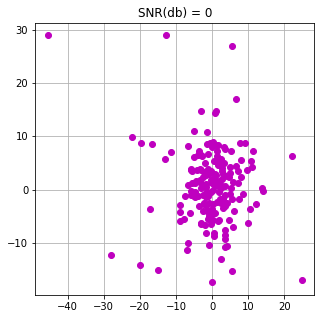

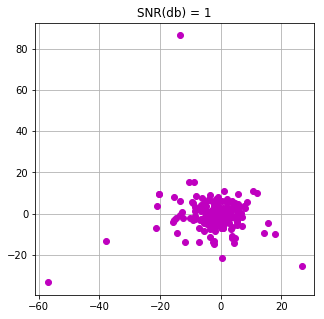

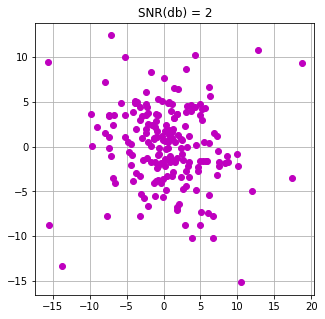

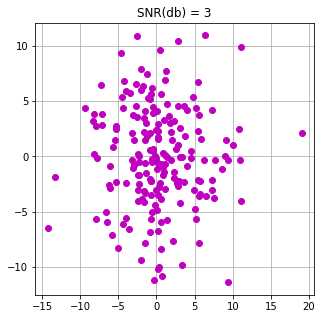

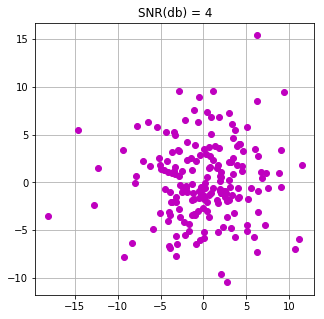

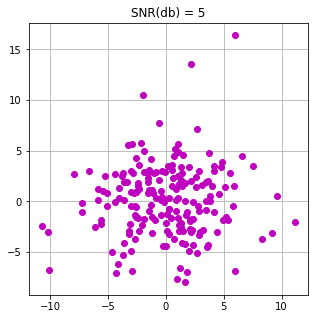

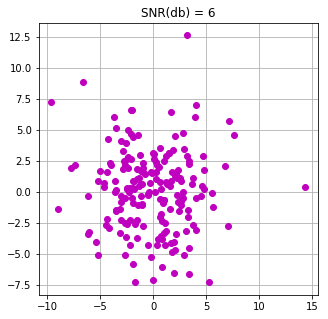

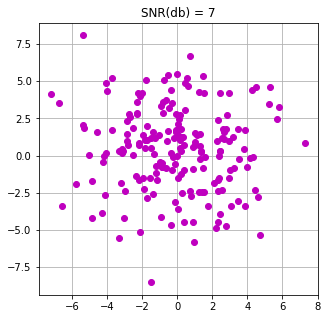

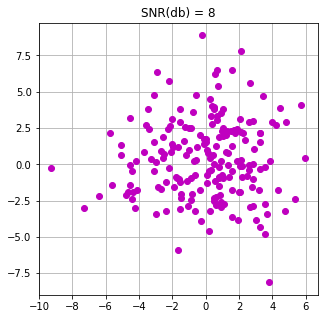

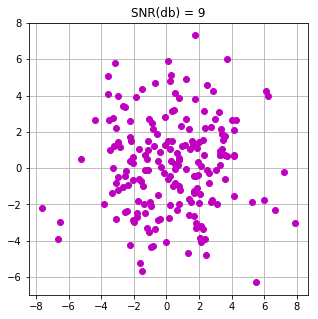

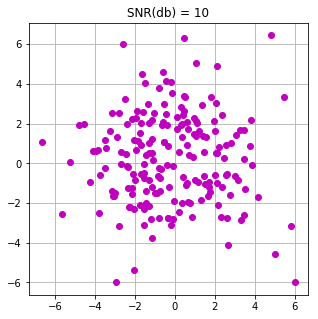

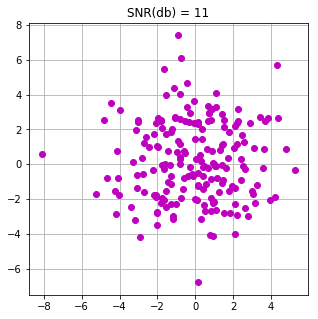

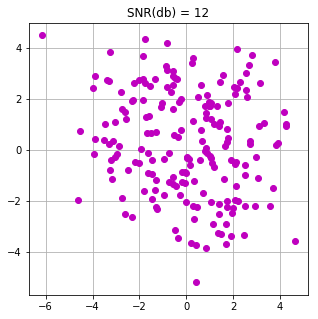

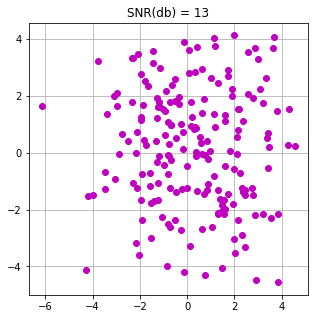

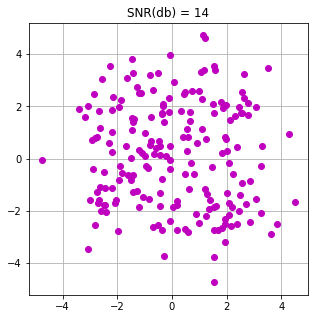

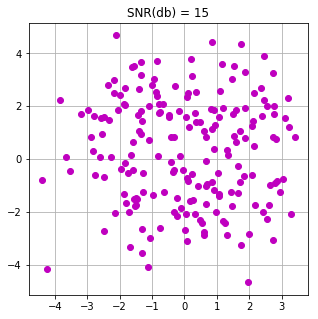

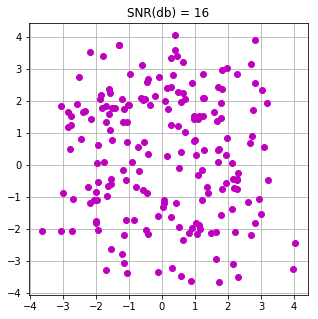

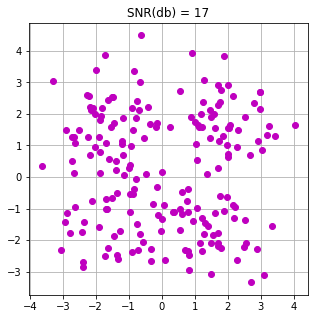

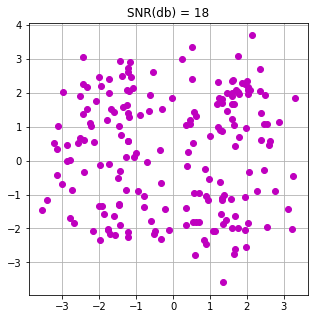

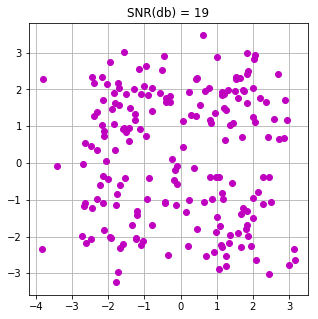

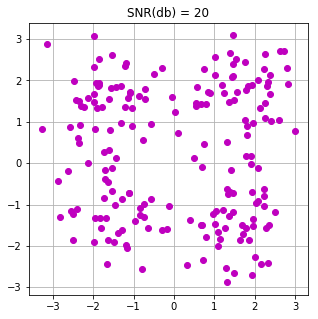

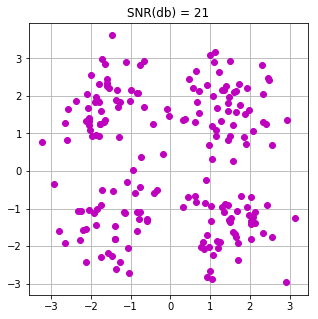

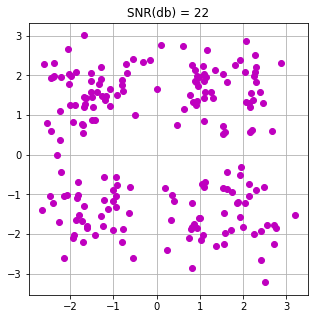

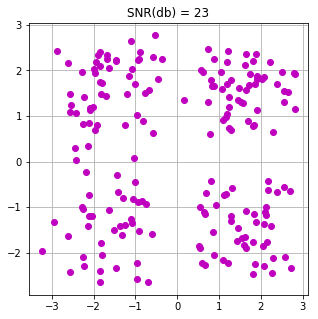

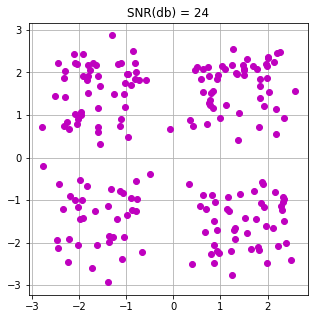

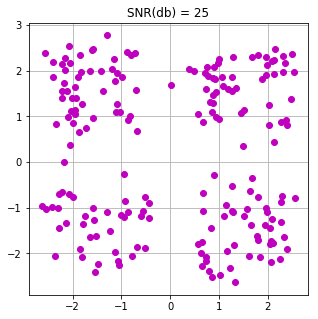

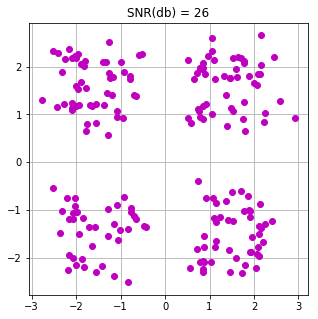

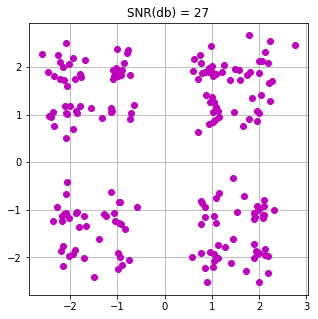

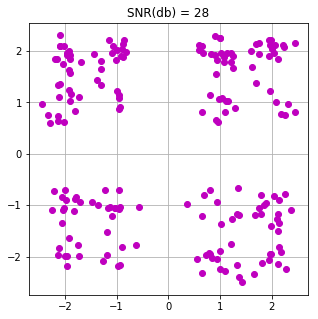

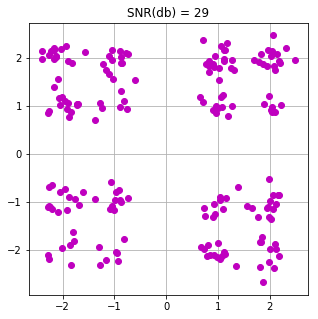

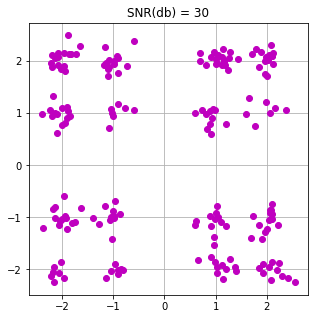

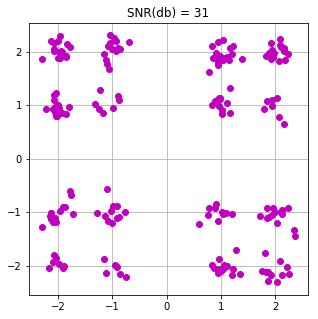

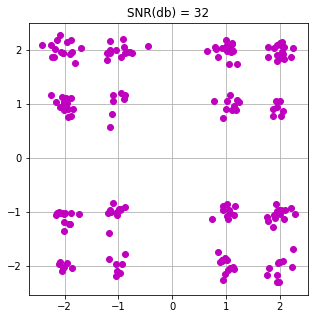

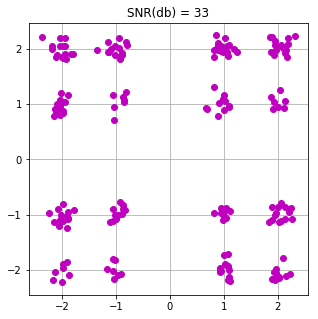

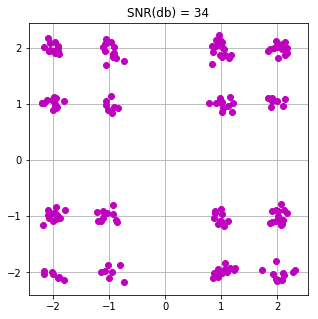

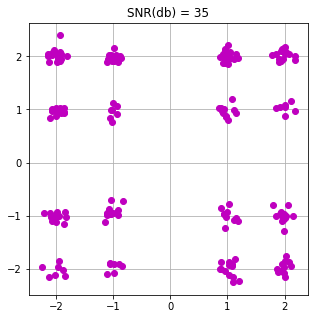

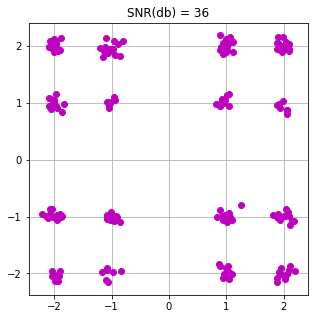

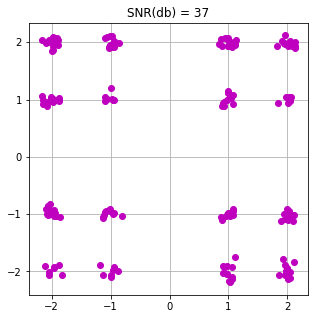

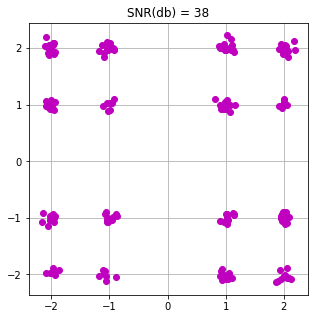

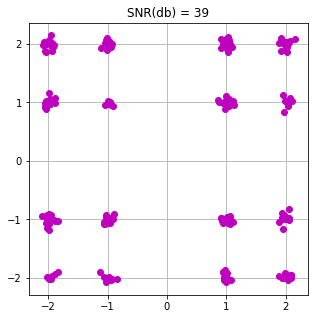

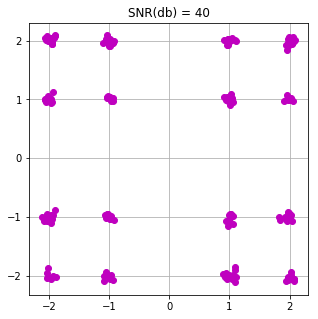

In [50]:
# Now we remove the pilot signals as their utility is over. Only extracting the data

def data_payload_simo(equalized_estimation):
    return equalized_estimation[msg_index]

QAM16_est_simo = []
QAM16_est_simo = [data_payload_simo(equalized_estimation_simo[i]) for i in range(snr_len)]

for i in range(snr_len):
    plt.figure(figsize=(5,5))
    plt.title("SNR(db) = "+str(SNRdb_arr[i]))     #giving title based on the SNR values
    plt.plot(QAM16_est_simo[i].real, QAM16_est_simo[i].imag, 'mo');
    plt.grid(True)

In [51]:
#We can compare this to the original constellation map of 16QAM

### Demapping to receive binary data 

#### SISO

def Demapping(QAM16_est):
    
    # array of possible constellation points. for 16QAM it'd have 16 elements
    constellation = np.array([x for x in demapping_table.keys()])
    #using the demapping table created before to convert back
    
    print("Shape of QAM16_est : ",QAM16_est.shape)
    print("Shape of constellation : ",constellation.shape)
    
    # calculate distance of each RX point to each possible point
    dists = abs(QAM16_est.reshape((-1,1)) - constellation.reshape((1,-1)))
    
    print("Reshaping both the 1D arrays to 2D array of distances among the points",dists.shape)
    
    # for each element in 16 QAM, choose the index in constellation 
    # that belongs to the nearest constellation point
    const_index = dists.argmin(axis=1)   #Returns the indices of the minimum values along an axis.
    
    # get back the real constellation point
    hardDecision = constellation[const_index]
    
    # transform the constellation point into the bit groups
    #vstack stacks the 2D array in row-wise manner & converts it to 1D again (in the form of parallel to serial)
    return np.vstack([demapping_table[z] for z in hardDecision]), hardDecision


PS_est, hardDecision = Demapping(QAM16_est)

plt.figure(figsize=(10,10))
for qam, hard in zip(QAM16_est, hardDecision):      #zip aggregates values to tuple
    plt.plot([qam.real, hard.real], [qam.imag, hard.imag], 'm-o');
    plt.plot(hardDecision.real, hardDecision.imag, 'ko')
plt.grid(color='r', linestyle='dotted', linewidth=0.5)

#this is the 1D demapped data
print("hardDecision : ",hardDecision)

##### This is the estimated 2D array sequence of the data locations
print("PS_est : ",PS_est)

#### SIMO

Shape of QAM16_est :  1 (191,)
Shape of constellation :  1 (16,)
Reshaping both the 1D arrays to 2D array of distances among the points 1 (191, 16)
Shape of QAM16_est :  2 (191,)
Shape of constellation :  2 (16,)
Reshaping both the 1D arrays to 2D array of distances among the points 2 (191, 16)
Shape of QAM16_est :  3 (191,)
Shape of constellation :  3 (16,)
Reshaping both the 1D arrays to 2D array of distances among the points 3 (191, 16)
Shape of QAM16_est :  4 (191,)
Shape of constellation :  4 (16,)
Reshaping both the 1D arrays to 2D array of distances among the points 4 (191, 16)
Shape of QAM16_est :  5 (191,)
Shape of constellation :  5 (16,)
Reshaping both the 1D arrays to 2D array of distances among the points 5 (191, 16)
Shape of QAM16_est :  6 (191,)
Shape of constellation :  6 (16,)
Reshaping both the 1D arrays to 2D array of distances among the points 6 (191, 16)
Shape of QAM16_est :  7 (191,)
Shape of constellation :  7 (16,)
Reshaping both the 1D arrays to 2D array of dis

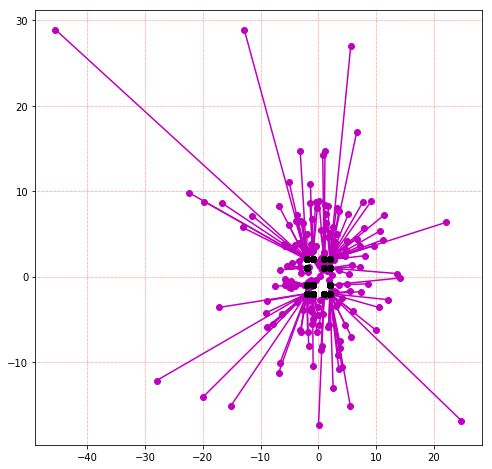

In [52]:
def Demapping_simo(QAM16_est,i):
    
    # array of possible constellation points. for 16QAM it'd have 16 elements
    constellation = np.array([x for x in demapping_table.keys()])
    #using the demapping table created before to convert back
    
    print("Shape of QAM16_est : ",i,QAM16_est.shape)
    print("Shape of constellation : ",i,constellation.shape)
    
    # calculate distance of each RX point to each possible point
    dists = abs(QAM16_est.reshape((-1,1)) - constellation.reshape((1,-1)))
    
    print("Reshaping both the 1D arrays to 2D array of distances among the points",i,dists.shape)
    
    # for each element in 16 QAM, choose the index in constellation 
    # that belongs to the nearest constellation point
    const_index = dists.argmin(axis=1)   #Returns the indices of the minimum values along an axis.
    
    # get back the real constellation point
    hardDecision = constellation[const_index]
    
    # transform the constellation point into the bit groups
    #vstack stacks the 2D array in row-wise manner & converts it to 1D again (in the form of parallel to serial)
    return np.vstack([demapping_table[z] for z in hardDecision]), hardDecision

PS_est_simo=[]
PS_est_simo=[0 for i in range(snr_len)]

hardDecision_simo=[]
hardDecision_simo=[0 for i in range(snr_len)]

for i in range(snr_len):
    PS_est_simo[i], hardDecision_simo[i] = Demapping_simo(QAM16_est_simo[i],i+1)

##### Consumes too much memory hence the all the figures are not printed
'''
for i in range(snr_len): 
    for qam, hard in zip(QAM16_est_simo[i], hardDecision_simo[i]):      #zip aggregates values to tuple
        plt.figure(figsize=(5,5))
        plt.plot([qam.real, hard.real], [qam.imag, hard.imag], 'm-o');
        plt.plot(hardDecision_simo[i].real, hardDecision_simo[i].imag, 'ko')
    plt.grid(color='r', linestyle='dotted', linewidth=0.5)
'''

##### Printing only the first constellation demap for visual satisfaction
plt.figure(figsize=(8,8))
for qam, hard in zip(QAM16_est_simo[0], hardDecision_simo[0]):      #zip aggregates values to tuple
        
        plt.plot([qam.real, hard.real], [qam.imag, hard.imag], 'm-o');
        plt.plot(hardDecision_simo[0].real, hardDecision_simo[0].imag, 'ko')
plt.grid(color='r', linestyle='dotted', linewidth=0.5)

In [53]:
#this is the 1D demapped data
for i in range(snr_len):
    print("hardDecision for SNR : ",i+1)
    print(hardDecision_simo[i])

hardDecision for SNR :  1
[-2.-1.j -2.-2.j  1.+1.j -1.-2.j  1.-2.j -2.+1.j -2.+2.j -2.+2.j -2.+1.j
 -2.+1.j -2.-1.j  1.+2.j  2.-1.j  1.+2.j -2.+2.j -2.+2.j  2.-2.j -2.-1.j
  2.+2.j  2.+2.j -2.+2.j  2.-2.j  2.+1.j -2.-2.j  2.-2.j  2.-2.j  1.+1.j
  2.-1.j -1.-1.j -2.-2.j -2.+2.j -2.-2.j -1.+2.j -1.-2.j -1.-1.j  2.+2.j
 -2.-1.j  1.+2.j -2.-1.j  1.-2.j  1.+1.j  2.-2.j -2.-2.j  2.+1.j  1.+2.j
  2.-2.j -2.+2.j -2.-2.j  2.+1.j  2.+2.j  2.-2.j -2.-2.j -2.-1.j -2.+2.j
  1.+2.j -2.+2.j -2.-2.j  1.-2.j  2.+2.j  2.+1.j -1.+2.j  2.+1.j  1.+2.j
  1.+2.j  1.+1.j -2.-2.j -2.-1.j  2.-1.j -2.-2.j  2.+2.j  1.+2.j  2.+2.j
 -1.-2.j  2.-2.j -2.-1.j -2.-1.j  2.+2.j -1.-2.j  2.+2.j  1.+2.j -2.+2.j
 -2.+1.j  2.+2.j  2.-2.j -2.+2.j -2.-2.j -2.-1.j  2.+1.j  2.-2.j  2.+2.j
  2.-2.j -2.-2.j -2.+2.j  1.+1.j  2.+2.j  2.-2.j -1.+2.j  2.+2.j -2.-2.j
  2.-2.j  2.+2.j -2.-2.j -2.-2.j -1.-1.j -1.-2.j  2.-2.j -1.-2.j  1.+2.j
 -1.+2.j -1.-2.j -2.-1.j  1.-2.j  2.-2.j  2.+2.j -2.+2.j  2.-1.j -2.+2.j
 -2.-2.j  2.+1.j -2.-2.j 

In [54]:
# This is the estimated 2D array sequence of the data locations
for i in range(snr_len):
    print("PS_est for SNR : ",i+1)
    print(PS_est_simo[i])

PS_est for SNR :  1
[[0 0 0 1]
 [0 0 0 0]
 [1 1 1 1]
 [0 1 0 0]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [1 1 1 0]
 [1 0 0 1]
 [1 1 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [1 0 1 0]
 [1 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 1 1]
 [0 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 1 1 1]
 [1 0 0 1]
 [0 1 0 1]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 1 1 0]
 [0 1 0 0]
 [0 1 0 1]
 [1 0 1 0]
 [0 0 0 1]
 [1 1 1 0]
 [0 0 0 1]
 [1 1 0 0]
 [1 1 1 1]
 [1 0 0 0]
 [0 0 0 0]
 [1 0 1 1]
 [1 1 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [1 0 1 1]
 [1 0 1 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [1 1 1 0]
 [0 0 1 0]
 [0 0 0 0]
 [1 1 0 0]
 [1 0 1 0]
 [1 0 1 1]
 [0 1 1 0]
 [1 0 1 1]
 [1 1 1 0]
 [1 1 1 0]
 [1 1 1 1]
 [0 0 0 0]
 [0 0 0 1]
 [1 0 0 1]
 [0 0 0 0]
 [1 0 1 0]
 [1 1 1 0]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 1 0]
 [1 1 1 0]
 [0 0 1 0]
 [0 0 1 1]
 [1 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 0 0]
 [0 0 0 1]
 [1 0 1 1]
 [1 0 0 0]
 

### Converting the data from parallel to serial in binary format 

#### SISO

def PS_RX(bits):
    return bits.reshape((-1,))

estimated_data = PS_RX(PS_est)
estimated_data

BER = np.sum(abs(input_data-estimated_data))/len(input_data)
print ("Obtained Bit error rate for SNR: ",BER)

#### SIMO

In [55]:
def PS_RX_simo(bits):
    return bits.reshape((-1,))

estimated_data_simo=[]

estimated_data_simo = [PS_RX_simo(PS_est_simo[i]) for i in range(snr_len)]
estimated_data_simo

[array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 

In [56]:
input_data

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,

In [57]:
BER_simo=[]
BER_simo=[np.sum(abs(input_data-estimated_data_simo[i]))/len(input_data) for i in range(snr_len)]

In [58]:
for i in range(snr_len):
    print ("Obtained Bit error rate for SNR: ", SNRdb_arr[i],BER_simo[i])

Obtained Bit error rate for SNR:  0 0.4489528795811518
Obtained Bit error rate for SNR:  1 0.4319371727748691
Obtained Bit error rate for SNR:  2 0.38350785340314136
Obtained Bit error rate for SNR:  3 0.4162303664921466
Obtained Bit error rate for SNR:  4 0.4162303664921466
Obtained Bit error rate for SNR:  5 0.3913612565445026
Obtained Bit error rate for SNR:  6 0.3586387434554974
Obtained Bit error rate for SNR:  7 0.34554973821989526
Obtained Bit error rate for SNR:  8 0.331151832460733
Obtained Bit error rate for SNR:  9 0.29842931937172773
Obtained Bit error rate for SNR:  10 0.281413612565445
Obtained Bit error rate for SNR:  11 0.28272251308900526
Obtained Bit error rate for SNR:  12 0.25523560209424084
Obtained Bit error rate for SNR:  13 0.23036649214659685
Obtained Bit error rate for SNR:  14 0.2107329842931937
Obtained Bit error rate for SNR:  15 0.18193717277486912
Obtained Bit error rate for SNR:  16 0.17015706806282724
Obtained Bit error rate for SNR:  17 0.1531413612565

### Plotting the bar graph to show how the BER is affected by Rx antenna SNR 

D:\anaconda_main\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'BER     --->')

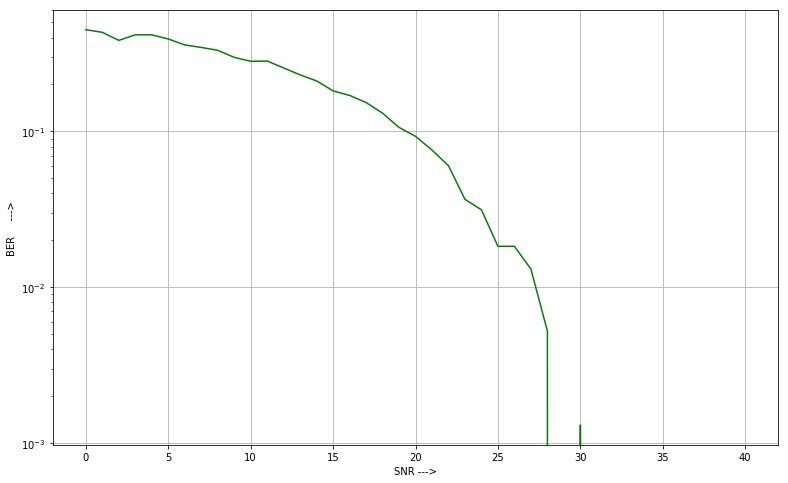

In [64]:
fig=plt.figure(figsize=(13,8))
plt.grid(True)
ax = fig.add_subplot(111)
ax.semilogy(SNRdb_arr, BER_simo,color='g')
ax.set_xlabel('SNR --->')
ax.set_ylabel('BER     --->')